In [1]:
import tensorflow as tf
from tensorflow import keras 

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

import matplotlib.pyplot as plt




### Create df

In [2]:
# define both features and labels dataframes, save as original dfs

df_ori_features = pd.read_csv('heart-disease-values.csv')

df_ori_labels = pd.read_csv('heart-disease-labels.csv')


# define two dfs which we will manipulate

df_features = df_ori_features

df_labels = df_ori_labels

In [3]:
# merge both dfs (NB we don't need to do this to feed X and y into our model. 
# But it's good to know how to.)



In [4]:
df_labels

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


### define X and y

In [5]:
# define X and y

X = df_features.drop(['patient_id'], axis='columns') # drop patient_id col

y = df_labels.drop(columns=['patient_id']) # drop patient_id col

In [6]:
# inspect df
    
X

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [7]:
# inspect df    

y 

# seeing that y has 1 or 0 (integers), label encoding won't be necessary

,heart_disease_present
0,0
1,0
2,1
3,1
4,0
...,...
175,1
176,1
177,1
178,0


In [8]:
# inspect data some more, how'as the distribution? Influences the feature scaling I'll use

X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
slope_of_peak_exercise_st_segment,180.0,1.550000,0.618838,1.0,1.00,1.0,2.00,3.0
resting_blood_pressure,180.0,131.311111,17.010443,94.0,120.00,130.0,140.00,180.0
chest_pain_type,180.0,3.155556,0.938454,1.0,3.00,3.0,4.00,4.0
num_major_vessels,180.0,0.694444,0.969347,0.0,0.00,0.0,1.00,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,0.161111,0.368659,0.0,0.00,0.0,0.00,1.0
resting_ekg_results,180.0,1.050000,0.998742,0.0,0.00,2.0,2.00,2.0
serum_cholesterol_mg_per_dl,180.0,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0
oldpeak_eq_st_depression,180.0,1.010000,1.121357,0.0,0.00,0.8,1.60,6.2
sex,180.0,0.688889,0.464239,0.0,0.00,1.0,1.00,1.0
age,180.0,54.811111,9.334737,29.0,48.00,55.0,62.00,77.0


### remove outliers

In [9]:
# serum_cholesterol_mg_per_dl	180.0	249.211111	52.717969	126.0	213.75	245.5	281.25	564.0
# max is so much higher than 75% (upper quartile) -- could this indicate many outliers in this row?

X['serum_cholesterol_mg_per_dl']

# drop rows 3 std devs from the mean (std = 53, mean = 249, 3 std devs = 159, 
# therefore anything over 408 and under 90 is an outlier)


0      308
1      214
2      304
3      223
4      270
      ... 
175    254
176    327
177    309
178    255
179    201
Name: serum_cholesterol_mg_per_dl, Length: 180, dtype: int64

In [10]:
# get index of all rows in 'serum_cholesterol_mg_per_dl' > 408 


condition1 = X['serum_cholesterol_mg_per_dl'] > 408

condition1_idx = X.index[condition1]

list_over_408 = condition1_idx.to_list()

print(list_over_408)


# get index of all rows in 'serum_cholesterol_mg_per_dl' < 90

condition2 = X['serum_cholesterol_mg_per_dl'] < 90

condition2_idx = X.index[condition2]

list_under_90 = condition2_idx.to_list()

print(list_under_90) # no values under 90, cf describe().transpose() above, min = 126



[43, 60]
[]


In [11]:
# remove rows on index position [43, 60] from X and y

X = X.drop(list_over_408) 

In [12]:
# inspect X without outliers

y = y.drop(list_over_408)

### define X_train, y_train, X_val, y_val, X_test, y_test

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((142, 13), (36, 13), (142, 1), (36, 1))

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5, random_state = 0)

X_val.shape, X_test.shape, y_val.shape, y_test.shape

((18, 13), (18, 13), (18, 1), (18, 1))

In [15]:
# inspect X_train

X_train

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
163,2,reversible_defect,142,4,3,0,2,309,0.0,1,45,147,1
94,2,normal,108,3,0,0,0,141,0.6,0,44,175,0
96,2,fixed_defect,145,4,2,0,2,212,2.0,1,64,132,0
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
24,1,normal,156,2,0,0,2,245,0.0,1,70,143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2,normal,130,4,2,0,0,303,2.0,0,64,122,0
69,2,reversible_defect,120,3,3,0,0,188,2.0,1,49,139,0
119,2,normal,138,4,3,1,0,294,1.9,0,62,106,0
48,2,reversible_defect,120,2,1,0,2,281,1.4,1,62,103,0


In [16]:
# inspect X_val

X_val

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
18,1,normal,130,2,0,0,2,204,0.0,1,29,202,0
170,1,reversible_defect,150,4,0,0,2,270,0.8,1,58,111,1
162,3,reversible_defect,160,4,3,0,2,164,6.2,0,62,145,0
128,3,reversible_defect,145,4,0,0,0,174,2.6,1,70,125,1
153,1,normal,112,4,1,0,2,290,0.0,1,44,153,0
5,1,normal,130,3,0,0,0,180,0.0,1,42,150,0
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1
62,3,reversible_defect,130,4,0,1,2,283,1.6,1,56,103,1
7,2,fixed_defect,150,4,1,0,2,276,0.6,1,57,112,1
106,1,reversible_defect,150,3,0,0,2,232,1.6,1,54,165,0


### feature scale the values

In [17]:
'''
ct = make_column_transformer(
    ( OneHotEncoder(handle_unknown='ignore', sparse=False), ['thal' ] ),
    ( MinMaxScaler(), [ 'slope_of_peak_exercise_st_segment', 'resting_blood_pressure',  'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex',	'age',	'max_heart_rate_achieved', 'exercise_induced_angina' ] )
)
'''

ct = make_column_transformer(
    ( OneHotEncoder(handle_unknown='ignore', sparse=False), ['thal' ] ),
    ( StandardScaler(), [ 'slope_of_peak_exercise_st_segment', 'resting_blood_pressure',  'chest_pain_type', 'num_major_vessels', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex',	'age',	'max_heart_rate_achieved', 'exercise_induced_angina' ] )
)


# let's use MinMax because we've removed outliers from the dataframe
# but let's try running our model with both types and see outcomes
# StandardScaler outperformed MinMax!

In [18]:
ct.fit(X_train)


# feature scale the values

X_train_scaled = ct.transform(X_train)

X_val_scaled = ct.transform(X_val)

X_test_scaled = ct.transform(X_test)


# inspect 

X_train_scaled[0:5], X_train_scaled.shape, X_val_scaled[0:5], X_val_scaled.shape


(array([[ 0.        ,  0.        ,  1.        ,  0.79356857,  0.7258456 ,
          0.90076771,  2.28948864, -0.42817442,  0.99649754,  1.44500046,
         -0.9318724 ,  0.68111491, -1.08924792, -0.1184424 ,  1.5430335 ],
        [ 0.        ,  1.        ,  0.        ,  0.79356857, -1.43202542,
         -0.14766684, -0.77756218, -0.42817442, -1.01063225, -2.38351254,
         -0.35695909, -1.46818104, -1.19763839,  1.17887715, -0.64807407],
        [ 1.        ,  0.        ,  0.        ,  0.79356857,  0.91624598,
          0.90076771,  1.26713837, -0.42817442,  0.99649754, -0.76551002,
          0.98450531,  0.68111491,  0.97017106, -0.81343503, -0.64807407],
        [ 0.        ,  1.        ,  0.        ,  0.79356857,  3.13758379,
          0.90076771, -0.77756218, -0.42817442, -0.00706736,  1.85519829,
          2.32596971, -1.46818104, -0.00534319, -1.50842765,  1.5430335 ],
        [ 0.        ,  1.        ,  0.        , -0.94007354,  1.61438072,
         -1.19610139, -0.77756218,

### create the model(s)

In [19]:
'''# set seed

tf.random.set_seed(42)

# create model

model1 = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model

model1.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='Sgd', metrics='accuracy')

# fit model

model1.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_val_scaled, y_val),
    verbose=2,
    epochs = 50)'''

"# set seed\n\ntf.random.set_seed(42)\n\n# create model\n\nmodel1 = keras.Sequential([\n    keras.layers.Dense(10, activation='relu'),\n    keras.layers.Dense(10, activation='relu'),\n    keras.layers.Dense(1, activation='sigmoid')\n])\n\n# compile model\n\nmodel1.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='Sgd', metrics='accuracy')\n\n# fit model\n\nmodel1.fit(\n    X_train_scaled, \n    y_train, \n    validation_data=(X_val_scaled, y_val),\n    verbose=2,\n    epochs = 50)"

In [20]:
'''# set seed

tf.random.set_seed(42)

# create model

model2 = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model

model2.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='Adam', metrics='accuracy')

# fit model

model2_history = model2.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_val_scaled, y_val),
    verbose=2,
    epochs = 50)'''

"# set seed\n\ntf.random.set_seed(42)\n\n# create model\n\nmodel2 = keras.Sequential([\n    keras.layers.Dense(10, activation='relu'),\n    keras.layers.Dense(10, activation='relu'),\n    keras.layers.Dense(1, activation='sigmoid')\n])\n\n# compile model\n\nmodel2.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='Adam', metrics='accuracy')\n\n# fit model\n\nmodel2_history = model2.fit(\n    X_train_scaled, \n    y_train, \n    validation_data=(X_val_scaled, y_val),\n    verbose=2,\n    epochs = 50)"

In [21]:
# set seed

tf.random.set_seed(42)

# create model

model3 = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model

model3.compile(loss=keras.losses.BinaryCrossentropy(), optimizer='Adam', metrics='accuracy')

# fit model

model3_history = model3.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_val_scaled, y_val),
    verbose=0,
    epochs=20)

2022-02-10 09:12:22.362494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-10 09:12:22.362826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-10 09:12:22.423446: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-02-10 09:12:22.627078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-10 09:12:22.915352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [22]:
model3.evaluate(X_val_scaled, y_val)

1/1 [==============================] - 0s 12ms/step - loss: 0.3882 - accuracy: 0.8889


[0.38817206025123596, 0.8888888955116272]

<AxesSubplot:title={'center':'...'}, xlabel='epochs', ylabel='loss'>

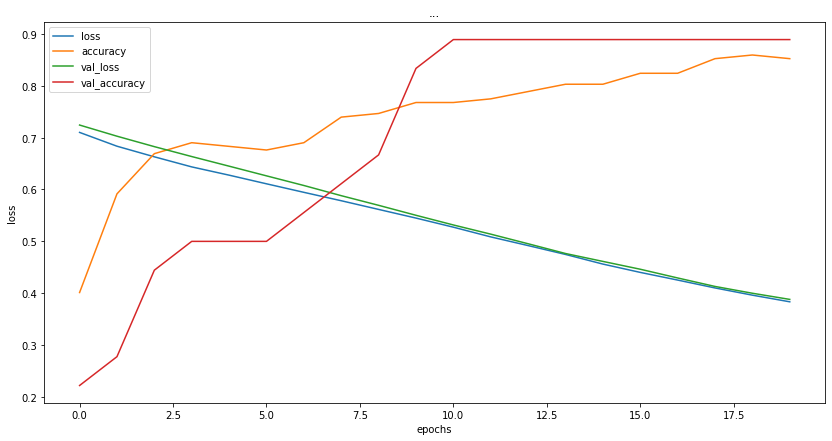

In [23]:
# loss curve

pd.DataFrame(model3_history.history).plot(
            figsize=(14,7), 
            title='...', 
            xlabel='epochs', 
            ylabel='loss'
            )


In [24]:
X_val_model3_pred = model3.predict(X_val_scaled)

X_val_model3_pred

2022-02-10 09:12:23.946007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.13061738],
       [0.60688007],
       [0.99028414],
       [0.7747221 ],
       [0.49122125],
       [0.11731264],
       [0.58763415],
       [0.57253426],
       [0.55724096],
       [0.63941544],
       [0.4473453 ],
       [0.01800566],
       [0.06448454],
       [0.6238787 ],
       [0.4121267 ],
       [0.7650503 ],
       [0.8614794 ],
       [0.36562356]], dtype=float32)

In [25]:
X_val_model3_pred.round(), y_val

(array([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]], dtype=float32),
      heart_disease_present
 18                       0
 170                      1
 162                      1
 128                      1
 153                      1
 5                        0
 113                      1
 62                       1
 7                        1
 106                      0
 125                      0
 63                       0
 37                       0
 52                       1
 92                       0
 8                        1
 56                       1
 55                       0)

In [26]:
# find out if there's class imbalance, in count of 1 and 0 in y (all the labels)

y.value_counts()

# there is only 11% difference between the classes; hence not high imbalance - meaning Accuracy is not a bad metric to use


heart_disease_present
0                        98
1                        80
dtype: int64

In [27]:
# import sklearn confusion_matrix

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

cm = confusion_matrix(y_val, X_val_model3_pred.round())

cm


array([[7, 1],
       [1, 9]])

In [28]:
# lower the threshold for 0 classification (higher Recall)

def x_val_pred_lower_threshold_func(X_val_pred):
    list=[]
    for i in range(len(X_val_pred)):
        if X_val_pred[i] <= 0.4:
            list.append(0)
        else: 
            list.append(1)
    return list

X_val_lower_thresh = x_val_pred_lower_threshold_func(X_val_model3_pred)

print(X_val_lower_thresh)


[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]


In [29]:
# create new confusion matrix

cm = confusion_matrix(y_val, X_val_lower_thresh)

cm

# when you lower the thres, False Negs decrease (to zero in this case, no FNs) and Recall goes up
# so let's redo the model with Recall metric and lower threshold

array([[ 5,  3],
       [ 0, 10]])

In [30]:

# set seed

tf.random.set_seed(42)

# create model

model4 = keras.Sequential([
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model

model4.compile(
    loss=keras.losses.BinaryCrossentropy(), 
    optimizer='Adam', 
    metrics=tf.keras.metrics.Recall(thresholds=0.4)
    #metrics='Accuracy'
    )

# fit model

model4_history = model4.fit(
    X_train_scaled, 
    y_train, 
    validation_data=(X_val_scaled, y_val),
    verbose=2,
    epochs=20)

Epoch 1/20


2022-02-10 09:12:24.329654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 - 0s - loss: 0.7100 - recall: 1.0000 - val_loss: 0.7242 - val_recall: 1.0000 - 455ms/epoch - 91ms/step
Epoch 2/20
5/5 - 0s - loss: 0.6834 - recall: 1.0000 - val_loss: 0.7027 - val_recall: 1.0000 - 45ms/epoch - 9ms/step
Epoch 3/20
5/5 - 0s - loss: 0.6630 - recall: 1.0000 - val_loss: 0.6826 - val_recall: 1.0000 - 54ms/epoch - 11ms/step


2022-02-10 09:12:24.578988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 4/20
5/5 - 0s - loss: 0.6435 - recall: 1.0000 - val_loss: 0.6635 - val_recall: 1.0000 - 44ms/epoch - 9ms/step
Epoch 5/20
5/5 - 0s - loss: 0.6276 - recall: 0.9844 - val_loss: 0.6449 - val_recall: 1.0000 - 45ms/epoch - 9ms/step
Epoch 6/20
5/5 - 0s - loss: 0.6109 - recall: 0.9688 - val_loss: 0.6263 - val_recall: 1.0000 - 44ms/epoch - 9ms/step
Epoch 7/20
5/5 - 0s - loss: 0.5945 - recall: 0.9219 - val_loss: 0.6077 - val_recall: 1.0000 - 44ms/epoch - 9ms/step
Epoch 8/20
5/5 - 0s - loss: 0.5783 - recall: 0.9219 - val_loss: 0.5881 - val_recall: 1.0000 - 45ms/epoch - 9ms/step
Epoch 9/20
5/5 - 0s - loss: 0.5616 - recall: 0.9062 - val_loss: 0.5695 - val_recall: 1.0000 - 46ms/epoch - 9ms/step
Epoch 10/20
5/5 - 0s - loss: 0.5449 - recall: 0.8906 - val_loss: 0.5503 - val_recall: 1.0000 - 45ms/epoch - 9ms/step
Epoch 11/20
5/5 - 0s - loss: 0.5273 - recall: 0.8906 - val_loss: 0.5316 - val_recall: 1.0000 - 46ms/epoch - 9ms/step
Epoch 12/20
5/5 - 0s - loss: 0.5086 - recall: 0.8906 - val_loss: 0.513

<AxesSubplot:title={'center':'...'}, xlabel='epochs', ylabel='loss'>

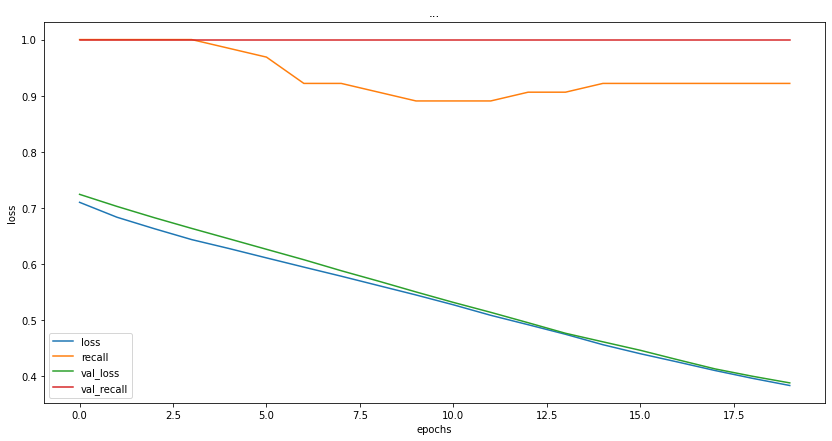

In [31]:
# loss curve

pd.DataFrame(model4_history.history).plot(
            figsize=(14,7), 
            title='...', 
            xlabel='epochs', 
            ylabel='loss'
            )


In [32]:

X_val_model4_pred = model4.predict(X_val_scaled)

print(X_val_model4_pred) 

[[0.13061738]
 [0.60688007]
 [0.99028414]
 [0.7747221 ]
 [0.49122125]
 [0.11731264]
 [0.58763415]
 [0.57253426]
 [0.55724096]
 [0.63941544]
 [0.4473453 ]
 [0.01800566]
 [0.06448454]
 [0.6238787 ]
 [0.4121267 ]
 [0.7650503 ]
 [0.8614794 ]
 [0.36562356]]


2022-02-10 09:12:25.734454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [33]:
# create new confusion matrix

cm = confusion_matrix(y_val, X_val_model4_pred.round())

cm

array([[7, 1],
       [1, 9]])